# Practice 5 - Searching Algorithms II

## Valenzuela Ascencio Gustavo - 117002029 - EDA II - Group: 2 - Semester: 2024-1 - FI UNAM

### Key transformation search.

Search operation in which keys or identifiers are transformed or modified in a certain way before being used to query a data structure. This transformation might involve applying a mathematical function, encoding, hashing, or any other form of manipulation to the search key to improve search efficiency or to match a specific data format.

### Hash table

Hash table is a data structure that contains values addressed with a particular key given by a hash function.

### Hash function

A hash function is a mathematical function or algorithm that takes an input (or "message") and returns a fixed-size string of bytes, typically a hexadecimal number or a sequence of characters. The output, often referred to as the "hash value" or "hash code," is a unique representation of the input data. The primary purpose of a hash function is to convert arbitrary data into a fixed-size value, which is typically used for various purposes, including data retrieval, data verification, and data storage.

### Collisions

In hash tables, a collision occurs when two or more different keys produce the same hash value or hash code, causing them to be mapped to the same location or bucket within the hash table. Hash collisions are inevitable in hash tables because there are typically more possible keys (input values) than there are available hash values or buckets.

### Collision handling techniques

##### Separate Chaining:

In this method, each bucket in the hash table maintains a linked list (or another data structure like an array) of key-value pairs.
When a collision occurs, the new key-value pair is simply added to the linked list at that bucket.
Retrieval involves searching the linked list at the corresponding bucket for the desired key.
Commonly used when the number of collisions is expected to be low, and it is easy to implement.

##### Open Addressing:

In open addressing, when a collision occurs, the algorithm searches for the next available (unoccupied) bucket in the hash table.
Different probing techniques can be used to determine the next bucket to check, such as linear probing (move to the next bucket), quadratic probing (move to the next bucket with a quadratic function), and double hashing (use a second hash function to find the next bucket).
Deletion can be more complex in open addressing because you must mark deleted entries or use special values to indicate an empty slot.
Open addressing is often used when memory efficiency is a concern, and it avoids the overhead of maintaining linked lists.

##### Double Hashing:

Double hashing involves using a secondary hash function when a collision occurs to calculate a new index.
The secondary hash function provides a step size to move to the next available bucket.
This method is more systematic than linear probing and can help reduce clustering of keys.

#### Hash table implementation using separate chaining and analysis using RAM model.

In [100]:
import random
import string

class Node:
    def __init__(self, key):
        self.key = key
        self.value = self.generate_random_string()

    def generate_random_string(self,length=16):
        characters = string.ascii_letters + string.digits
        random_string = ''.join(random.choice(characters) for _ in range(length))
        return random_string

class HashTable:
    #                       TIME || SPACE
    def __init__(self, size):
        self.size = size
        self.table = [None] * size # n || n

    # Hash function using multiplication method
    
    def hash(self, key):
        # Multiplicative constant (golden ratio approximation)
        hash_value = key**2 % self.size # 9 || 1
        return hash_value # 1 || 1
    
    # Hash function polynomial (TIME) (for numbers only): 13 = O(1)
    # Hash function polynomial (SPACE) (for numbers only): 3 = O(1)

    # Insert a key-value pair into the hash table
    def insert(self, key, value):
        hash_value = self.hash(key) # 6 || 1
        if self.table[hash_value] is None: # 6 || 1
            self.table[hash_value] = [] # 5 || 1
        self.table[hash_value].append((key, value)) # 6 || m (Creating more space in every collision)
    
    # Hash function polynomial (TIME) (for numbers only): 23 = O(1)
    # Hash function polynomial (SPACE) (for numbers only): n+4 = O(n)
        
    # Retrieve the value associated with a key
    def get(self, key):
        hash_value = self.hash(key) # 6 || 1
        if self.table[hash_value] is not None: # 5 || 1
            for k, v in self.table[hash_value]: # 6(n+1) || 1
                if k == key: # 4n # 1
                    return v,hash_value # 1 || 1
        return None # 1
    
    # Hash function polynomial (TIME) (for numbers only): 10n + 19 = O(n)
    # Hash function polynomial (SPACE) (for numbers only): 5 = O(1)

    # Delete a key-value pair from the hash table
    def delete(self, key):
        hash_value = self.hash(key) # 4 || 1
        if self.table[hash_value] is not None: # 5 || 1
            for i, (k, _) in enumerate(self.table[hash_value]): # 9(n+1) || 1
                if k == key: # 4n || 1
                    del self.table[hash_value][i] # 1 || 1
                    return # 1 || 1
                
    # Hash function polynomial (TIME) (for numbers only): 13n + 20 = O(n)
    # Hash function polynomial (SPACE) (for numbers only): 6 = O(1)

# Example usage
if __name__ == "__main__":
    hash_table = HashTable(1009)

    # Insert nodes into the hash table
    for i in range(10):
        node = Node(i)
        hash_table.insert(node.key, node.value)
        
    keys_to_test = [42, 137, 531, 724, 900, 232, 809, 1234]
    
    for key in keys_to_test:
        node = Node(key)
        hash_table.insert(node.key, node.value)

    # Retrieve and print values associated with keys
    for i in range(10):
        value, hIndex = hash_table.get(i)
        print(f"Index {hIndex} Key: {i}, Value: {value}")
    
    for key in keys_to_test:
        value, hIndex = hash_table.get(key)
        print(f"Index {hIndex} Key: {key}, Value: {value}")
        


Index 0 Key: 0, Value: yKLr19e7nYCKuTKC
Index 1 Key: 1, Value: RmhCL5pb04j0PZVg
Index 4 Key: 2, Value: 94UikWAYAKz82kfM
Index 9 Key: 3, Value: Pyho6w8D6QANui2y
Index 16 Key: 4, Value: OOZU1XCEbWr2Rbsf
Index 25 Key: 5, Value: BKTkVoNuLSQ0FCHz
Index 36 Key: 6, Value: RHwOjOWCgnMg2Rlu
Index 49 Key: 7, Value: i10qVahIe8Y8kZ4A
Index 64 Key: 8, Value: WKkpKqXs7W2RF3RR
Index 81 Key: 9, Value: RXAflltDYgatjqLx
Index 755 Key: 42, Value: nqCwI70PkGB3KISI
Index 607 Key: 137, Value: tQCgQSn1Ku9JTcCU
Index 450 Key: 531, Value: w4FOwPcyXYWbUk4s
Index 505 Key: 724, Value: 8Pc1hw9KAEHO6PXD
Index 782 Key: 900, Value: KgMJzcXPtySXm7qF
Index 347 Key: 232, Value: pPsQDj3Ga8tyxGjZ
Index 649 Key: 809, Value: vp62oPQPiEHqt1uh
Index 175 Key: 1234, Value: GaR0mOtMJCroQHTn


#### Hash table implementation using open adressing (quadratic probing RAM model analysis).

In [120]:
import random
import string

class Node:
    def __init__(self, key):
        self.key = key
        self.value = self.generate_random_string()

    def generate_random_string(self,length=16):
        characters = string.ascii_letters + string.digits
        random_string = ''.join(random.choice(characters) for _ in range(length))
        return random_string

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    # Hash function using multiplication method (for non-string keys)
    def hash(self, key):
        hash_value = key**2 % self.size
        return hash_value

    # Insert a key-value pair into the hash table using quadratic probing 
    def insert(self, key, value):
        hash_value = self.hash(key)
        
        if self.table[hash_value] is None:
            self.table[hash_value] = (key, value)
        else:
            # Quadratic probing
            i = 1 # 3
            while self.table[(hash_value + i*i) % self.size] is not None: # 7(n+1)
                i += 1 #4 n
            self.table[(hash_value + i*i) % self.size] = (key, value)

        # Quadratic probing polynomial: 11n + 10 = O(n)

    # Retrieve the value associated with a key using quadratic probing
    def get(self, key):
        hash_value = self.hash(key)
        
        i = 0
        while i < self.size:
            current_hash = (hash_value + i*i) % self.size
            if self.table[current_hash] is None:
                return None
            k, v = self.table[current_hash]
            if k == key:
                return v, current_hash
            i += 1
        return None

    # Delete a key-value pair from the hash table using quadratic probing
    def delete(self, key):
        if isinstance(key, str):
            hash_value = self.hashByString(key)
        else:
            hash_value = self.hash(key)

        i = 0
        while i < self.size:
            current_hash = (hash_value + i*i) % self.size
            if self.table[current_hash] is None:
                return  # Key not found
            k, _ = self.table[current_hash]
            if k == key:
                self.table[current_hash] = None
                return
            i += 1

if __name__ == "__main__":
    hash_table = HashTable(1009)

    # Insert nodes into the hash table
    for i in range(10):
        node = Node(i)
        hash_table.insert(node.key, node.value)

    # Retrieve and print values associated with keys
    for i in range(10):
        value, hIndex = hash_table.get(i)
        print(f"Index {hIndex} Key: {i}, Value: {value}")

Index 0 Key: 0, Value: GSh1IJM7O39eE3Kg
Index 1 Key: 1, Value: kEwWzEYTCzWnuW7a
Index 4 Key: 2, Value: 4Q5JC940R6JqpFpE
Index 9 Key: 3, Value: VAl6BfLizkeDGhZL
Index 16 Key: 4, Value: 6evfoLcAvVWAJ0jR
Index 25 Key: 5, Value: eNeJrI6EyhAK7xLV
Index 36 Key: 6, Value: fo4rtSd7lvVZMqDG
Index 49 Key: 7, Value: 14STf5NXy7qhh0D0
Index 64 Key: 8, Value: 3LIG8i3ax5akEUgL
Index 81 Key: 9, Value: 6nRzCIZtzAWiuPIr


### Implemenation for using string as the key (Chaining)

In [102]:
import random
import string

class Node:
    def __init__(self, key):
        self.key = key
        self.value = self.generate_random_string()

    def generate_random_string(self, length=16):
        characters = string.ascii_letters + string.digits
        random_string = ''.join(random.choice(characters) for _ in range(length))
        return random_string

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    # Hash function using multiplication method for strings
    def hash(self, key):
        A = 0.6180339887
        sum = 0
        for i in key:
            sum += ord(i)
        hash_value = int(self.size * ((sum * A) % 1))
        return hash_value

    def insert(self, key, value):
        hash_value = self.hash(key)
        if self.table[hash_value] is None:
            self.table[hash_value] = []
        self.table[hash_value].append((key, value))

    def get(self, key):
        hash_value = self.hash(key)
        if self.table[hash_value] is not None:
            for k, v in self.table[hash_value]:
                if k == key:
                    return v, hash_value
        return None

    def delete(self, key):
        hash_value = self.hash(key)
        if self.table[hash_value] is not None:
            for i, (k, _) in enumerate(self.table[hash_value]):
                if k == key:
                    del self.table[hash_value][i]
                    return

# Example usage
if __name__ == "__main__":
    hash_table = HashTable(1009)

    # Insert nodes into the hash table with string keys
    keys = ["apple", "banana", "cherry", "date", "fig", "grape", "kiwi", "lemon", "mango", "orange","orangw", "orange","bppld"]
    for key in keys:
        node = Node(key)
        hash_table.insert(node.key, node.value)

    # Retrieve and print values associated with keys
    for key in keys:
        value, hIndex = hash_table.get(key)
        print(f"Index {hIndex} Key: {key}, Value: {value}")


Index 563 Key: apple, Value: xxAQJFGqBEwxNNXu
Index 386 Key: banana, Value: 3qaKrVj1CcbgFjcv
Index 581 Key: cherry, Value: XmMtfh0OTb7v8gam
Index 873 Key: date, Value: G50OrU4fhoqwh0Gc
Index 595 Key: fig, Value: Xi2v6EhVthXHb1Tl
Index 710 Key: grape, Value: 9fbWKMCP1h4AMbrf
Index 466 Key: kiwi, Value: kL5HhbszM4KPwXZE
Index 121 Key: lemon, Value: la7x0xfeC4Lwpnw7
Index 563 Key: mango, Value: Exnx1cEgXlFTKpUO
Index 70 Key: orange, Value: Q1Tbvxc5Yij862op
Index 195 Key: orangw, Value: TjuKPwV6PDQoMocr
Index 70 Key: orange, Value: Q1Tbvxc5Yij862op
Index 563 Key: bppld, Value: wiONd6SbZ7KyazCN


In [103]:
import random
import string

class Node:
    def __init__(self, key):
        self.key = key
        self.value = self.generate_random_string()

    def generate_random_string(self, length=16):
        characters = string.ascii_letters + string.digits
        random_string = ''.join(random.choice(characters) for _ in range(length))
        return random_string

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    # Hash function using multiplication method for strings
    def hash(self, key):
        A = 0.6180339887
        sum = 0
        for i in key:
            sum += ord(i)
        hash_value = int(self.size * ((sum * A) % 1))
        return hash_value

    # Quadratic probing to resolve collisions
    def probe(self, hash_value, step):
        return (hash_value + step**2) % self.size

    def insert(self, key, value):
        hash_value = self.hash(key)
        step = 1
        while self.table[hash_value] is not None:
            hash_value = self.probe(hash_value, step)
            step += 1

        self.table[hash_value] = (key, value)

    def get(self, key):
        hash_value = self.hash(key)
        step = 1
        while self.table[hash_value] is not None:
            k, v = self.table[hash_value]
            if k == key:
                return v, hash_value
            hash_value = self.probe(hash_value, step)
            step += 1
        return None

    def delete(self, key):
        hash_value = self.hash(key)
        step = 1
        while self.table[hash_value] is not None:
            k, _ = self.table[hash_value]
            if k == key:
                self.table[hash_value] = None
                return
            hash_value = self.probe(hash_value, step)
            step += 1

# Example usage
if __name__ == "__main__":
    hash_table = HashTable(1009)

    # Insert nodes into the hash table with string keys
    keys = ["apple", "banana", "cherry", "date", "fig", "grape", "kiwi", "lemon", "mango", "orangw", "orange", "bppld","mbngt"]
    for key in keys:
        node = Node(key)
        hash_table.insert(node.key, node.value)

    # Retrieve and print values associated with keys
    for key in keys:
        value, hIndex = hash_table.get(key)
        print(f"Index {hIndex} Key: {key}, Value: {value}")


Index 563 Key: apple, Value: KtVmChWaFlbxRTnG
Index 386 Key: banana, Value: lCzoB3nbUCgMdT8S
Index 581 Key: cherry, Value: acXCRt7YE7F8NKmQ
Index 873 Key: date, Value: G7CFReLlLun37noa
Index 595 Key: fig, Value: TRgApzscASZvohR6
Index 710 Key: grape, Value: MgS5S9ni4oCAoHgI
Index 466 Key: kiwi, Value: rGlqUWoE3N6osbyf
Index 121 Key: lemon, Value: NHyaO5b7E7XkzgvK
Index 564 Key: mango, Value: d81BXuuCCBIZWisw
Index 195 Key: orangw, Value: tx0xEoRNe84fzAjf
Index 70 Key: orange, Value: 9GzxngJeuK2RLKcW
Index 568 Key: bppld, Value: 95bNOQzJbF6c7QPA
Index 268 Key: mbngt, Value: Cl4gVCfeHMvMGiwW


### Complexity graphs


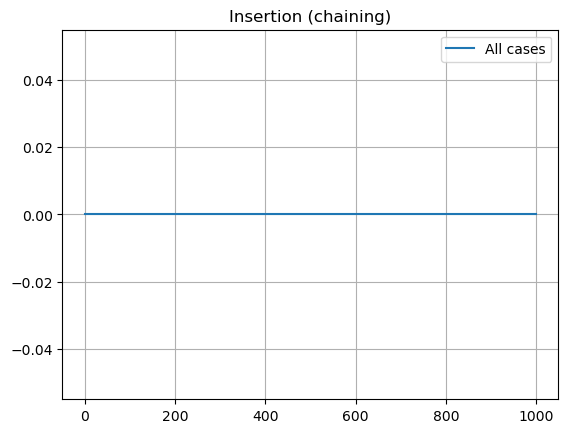

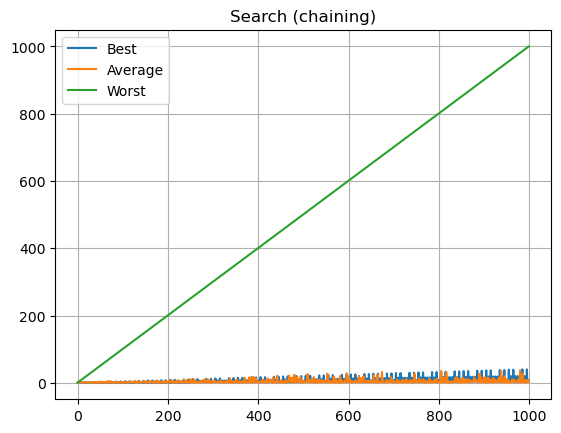

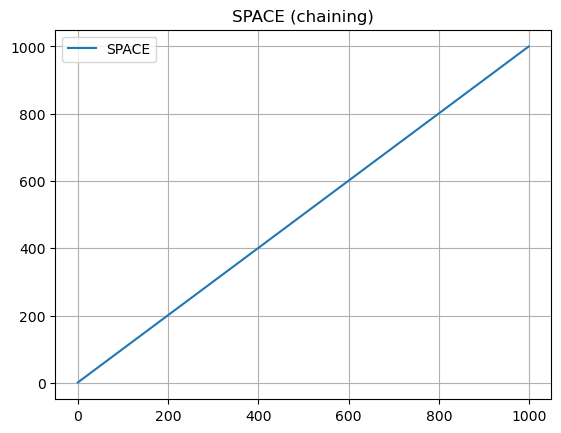

In [135]:
import matplotlib.pyplot as plt
import random
import string

time = 0
space = 0

class Node:
    def __init__(self, key):
        self.key = key
        self.value = self.generate_random_string()

    def generate_random_string(self,length=16):
        characters = string.ascii_letters + string.digits
        random_string = ''.join(random.choice(characters) for _ in range(length))
        return random_string

class HashTable:
    #                       TIME || SPACE
    def __init__(self, size):
        self.size = size
        self.table = [None] * size # n || n

    # Hash function using multiplication method
    
    def hash(self, key):
        global time
        # Multiplicative constant (golden ratio approximation)
        hash_value = (key**2)%self.size
        return hash_value # 1 || 1
    
    # Hash function polynomial (TIME) (for numbers only): 13 = O(1)
    # Hash function polynomial (SPACE) (for numbers only): 3 = O(1)

    # Insert a key-value pair into the hash table
    def insert(self, key, value):
        global space
        hash_value = self.hash(key) # 6 || 1
        if self.table[hash_value] is None: # 6 || 1
            self.table[hash_value] = [] # 5 || 1
        self.table[hash_value].append((key, value)) # 6 || m (Creating more space in every collision)
        space = len(self.table[hash_value])
        
    # Hash function polynomial (TIME) (for numbers only): 23 = O(1)
    # Hash function polynomial (SPACE) (for numbers only): n+4 = O(n)
        
    # Retrieve the value associated with a key
    def get(self, key):
        global time
        hash_value = self.hash(key) # 6 || 1
        if self.table[hash_value] is not None: # 5 || 1
            for k, v in self.table[hash_value]: # 6(n+1) || 1
                time += 1
                if k == key: # 4n # 1
                    return v,hash_value # 1 || 1
        return None # 1
    
    # Hash function polynomial (TIME) (for numbers only): 10n + 19 = O(n)
    # Hash function polynomial (SPACE) (for numbers only): 5 = O(1)

    # Delete a key-value pair from the hash table
    def delete(self, key):
        global time
        hash_value = self.hash(key) # 4 || 1
        if self.table[hash_value] is not None: # 5 || 1
            for i, (k, _) in enumerate(self.table[hash_value]): # 9(n+1) || 1
                time+=1
                if k == key: # 4n || 1
                    del self.table[hash_value][i] # 1 || 1
                    return # 1 || 1
    def clear(self):
        self.table.clear()
                
    # Hash function polynomial (TIME) (for numbers only): 13n + 20 = O(n)
    # Hash function polynomial (SPACE) (for numbers only): 6 = O(1)

# Example usage
if __name__ == "__main__":
    
    hash_table = HashTable(1000)

    n = 1000
    
    x = []
    y = []
    
    # (Insertion)
    for i in range(n):
        node = Node(i)
        x.append(i)
        hash_table.insert(node.key, node.value)
        y.append(time)
        time = 0
    
    plt.plot(x,y,label = "All cases")
    plt.legend()
    plt.title('Insertion (chaining)')
    plt.grid(True)
    plt.show()
    
    
    
    x = []
    y = []
    
    for i in range(n):
        node = Node(i)
        x.append(i)
        hash_table.get(node.key)
        y.append(time)
        time = 0
    
    hash_table.clear()
    hash_table = HashTable(1000)
    
    u = []
    v = []
    
    save = []
    for i in range(n):
        s = random.randint(-500,500)
        save.append(s)
        node = Node(s)
        hash_table.insert(node.key, node.value)
    
    for i in range(n):
        node = Node(save[i])
        u.append(i)
        hash_table.get(node.key)
        v.append(time)
        time = 0
    
    hash_table.clear()
    hash_table = HashTable(1000)
    
    a = []
    b = []

    c = []
    d = []
    
    for i in range(n):
        node = Node(i*1000)
        hash_table.insert(node.key,node.value)
        c.append(i)
        d.append(space)
        space = 0
    
    for i in range(n):
        a.append(i)
        node = Node(i*1000)
        hash_table.get(node.key)
        b.append(time)
        time = 0
    
    plt.plot(x,y,label = "Best")
    plt.plot(u,v,label = "Average")
    plt.plot(a,b,label = "Worst")
    plt.legend()
    plt.title('Search (chaining)')
    plt.grid(True)
    plt.show()
    
    plt.plot(c,d,label = "SPACE")
    plt.legend()
    plt.title('SPACE (chaining)')
    plt.grid(True)
    plt.show()
    


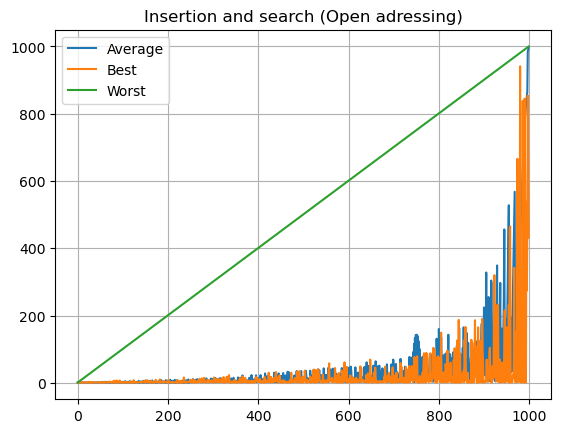

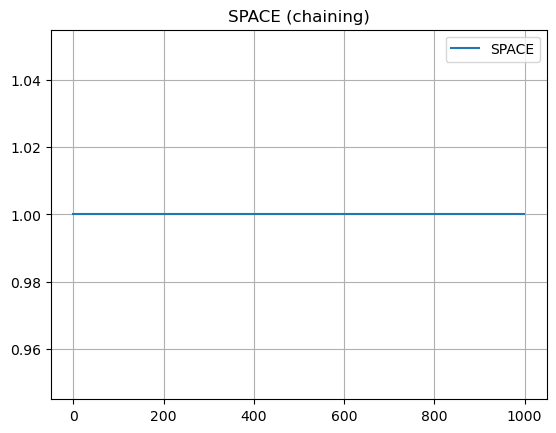

In [156]:
import matplotlib.pyplot as plt
import random
import string

time = 0
space = 1

class Node:
    def __init__(self, key):
        self.key = key
        self.value = self.generate_random_string()

    def generate_random_string(self,length=16):
        characters = string.ascii_letters + string.digits
        random_string = ''.join(random.choice(characters) for _ in range(length))
        return random_string

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    # Hash function using multiplication method (for non-string keys)
    def hash(self, key):
        hash_value = (key**2) % self.size
        return hash_value

    # Insert a key-value pair into the hash table using quadratic probing 
    def insert(self, key, value):
        global time
        hash_value = self.hash(key)
        
        if self.table[hash_value] is None:
            self.table[hash_value] = (key, value)
        else:
            # Quadratic probing
            i = 1 # 3
            while self.table[(hash_value + i) % self.size] is not None: # 7(n+1)
                time += 1
                i += 1 #4 n
            self.table[(hash_value + i) % self.size] = (key, value)

        # Quadratic probing polynomial: 11n + 10 = O(n)

    # Retrieve the value associated with a key using quadratic probing
    def get(self, key):
        global time
        hash_value = self.hash(key)
        
        i = 0
        while i < self.size:
            time+=1
            current_hash = (hash_value + i) % self.size
            if self.table[current_hash] is None:
                return None
            k, v = self.table[current_hash]
            if k == key:
                return v, current_hash
            i += 1
        return None

    # Delete a key-value pair from the hash table using quadratic probing
    def delete(self, key):
        if isinstance(key, str):
            hash_value = self.hashByString(key)
        else:
            hash_value = self.hash(key)

        i = 0
        while i < self.size:
            current_hash = (hash_value + i) % self.size
            if self.table[current_hash] is None:
                return  # Key not found
            k, _ = self.table[current_hash]
            if k == key:
                self.table[current_hash] = None
                return
            i += 1
    def clear(self):
        self.table.clear()

if __name__ == "__main__":
    
    hash_table = HashTable(1000)

    n = 1000
    
    x = []
    y = []
    
    # (Insertion)
    for i in range(n):
        node = Node(i)
        x.append(i)
        hash_table.insert(node.key, node.value)
        y.append(time)
        time = 0
    
    x = []
    y = []
    
    for i in range(n):
        node = Node(i)
        x.append(i)
        hash_table.get(node.key)
        y.append(time)
        time = 0
    
    hash_table.clear()
    hash_table = HashTable(1000)
    
    u = []
    v = []
    
    save = []
    for i in range(n):
        s = random.randint(-500,500)
        save.append(s)
        node = Node(s)
        hash_table.insert(node.key, node.value)
        time = 0
    
    for i in range(n):
        node = Node(save[i])
        u.append(i)
        hash_table.get(node.key)
        v.append(time)
        time = 0
    
    hash_table.clear()
    hash_table = HashTable(1000)
    
    a = []
    b = []

    for i in range(n):
        node = Node(i*1000)
        hash_table.insert(node.key,node.value)
        time = 0
    
    for i in range(n):
        a.append(i)
        node = Node(i*1000)
        hash_table.get(node.key)
        b.append(time)
        time = 0
    
    plt.plot(x,y,label = "Average")
    plt.plot(u,v,label = "Best")
    plt.plot(a,b,label = "Worst")
    plt.legend()
    plt.title('Insertion and search (Open adressing)')
    plt.grid(True)
    plt.show()
    
    c = []
    d = []
    for i in range (n):
        c.append(i)
        d.append(space)
        
    plt.plot(c,d,label = "SPACE")
    plt.legend()
    plt.title('SPACE (chaining)')
    plt.grid(True)
    plt.show()

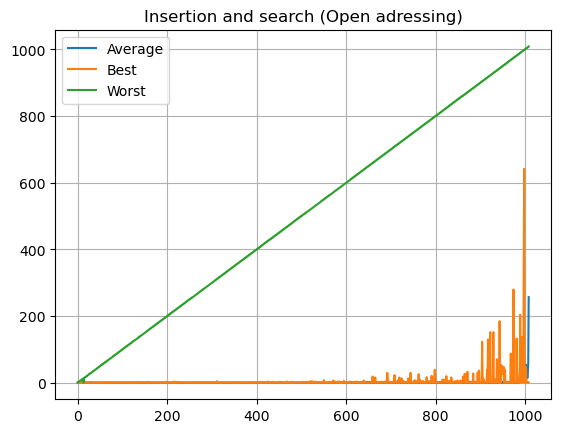

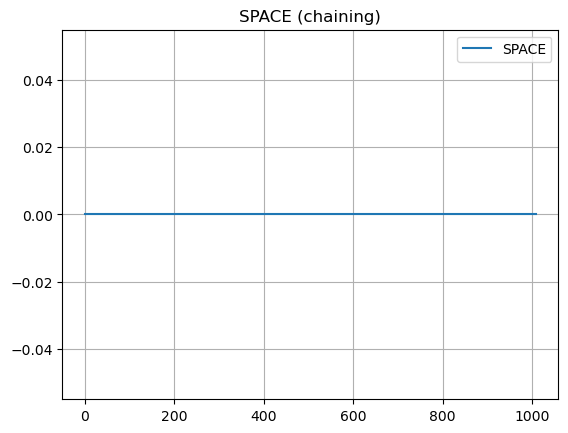

In [157]:
import matplotlib.pyplot as plt
import random
import string

time = 0
space = 0

class Node:
    def __init__(self, key):
        self.key = key
        self.value = self.generate_random_string()

    def generate_random_string(self,length=16):
        characters = string.ascii_letters + string.digits
        random_string = ''.join(random.choice(characters) for _ in range(length))
        return random_string

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    # Hash function using multiplication method (for non-string keys)
    def hash(self, key):
        A = 0.6180339887
        hash_value = int(self.size * ((key * A) % 1))
        return hash_value

    # Insert a key-value pair into the hash table using quadratic probing 
    def insert(self, key, value):
        global time
        hash_value = self.hash(key)
        
        if self.table[hash_value] is None:
            self.table[hash_value] = (key, value)
        else:
            # Quadratic probing
            i = 1 # 3
            while self.table[(hash_value + i) % self.size] is not None: # 7(n+1)
                time += 1
                i += 1 #4 n
            self.table[(hash_value + i) % self.size] = (key, value)

        # Quadratic probing polynomial: 11n + 10 = O(n)

    # Retrieve the value associated with a key using quadratic probing
    def get(self, key):
        global time
        hash_value = self.hash(key)
        i = 0
        while i < self.size:
            time+=1
            current_hash = (hash_value + i) % self.size
            if self.table[current_hash] is None:
                return None
            k, v = self.table[current_hash]
            if k == key:
                return v, current_hash
            i += 1
        return None

    # Delete a key-value pair from the hash table using quadratic probing
    def delete(self, key):
        if isinstance(key, str):
            hash_value = self.hashByString(key)
        else:
            hash_value = self.hash(key)

        i = 0
        while i < self.size:
            current_hash = (hash_value + i) % self.size
            if self.table[current_hash] is None:
                return  # Key not found
            k, _ = self.table[current_hash]
            if k == key:
                self.table[current_hash] = None
                return
            i += 1
    def clear(self):
        self.table.clear()

if __name__ == "__main__":
    
    hash_table = HashTable(1009)

    n = 1009
    
    x = []
    y = []
    
    # (Insertion)
    for i in range(n):
        node = Node(i)
        x.append(i)
        hash_table.insert(node.key, node.value)
        y.append(time)
        time = 0
    
    x = []
    y = []
    
    for i in range(n):
        node = Node(i)
        x.append(i)
        hash_table.get(node.key)
        y.append(time)
        time = 0
    
    hash_table.clear()
    hash_table = HashTable(1009)
    
    u = []
    v = []
    
    save = []
    for i in range(n):
        s = random.randint(-500,500)
        save.append(s)
        node = Node(s)
        hash_table.insert(node.key, node.value)
        time = 0
    
    for i in range(n):
        node = Node(save[i])
        u.append(i)
        hash_table.get(node.key)
        v.append(time)
        time = 0
    
    hash_table.clear()
    hash_table = HashTable(1009)
    
    a = []
    b = []

    for i in range(n):
        node = Node(i*(1/ 0.6180339887))
        hash_table.insert(node.key,node.value)
        time = 0
    
    for i in range(n):
        a.append(i)
        node = Node(i*(1/ 0.6180339887))
        hash_table.get(node.key)
        b.append(time)
        time = 0
    
    plt.plot(x,y,label = "Average")
    plt.plot(u,v,label = "Best")
    plt.plot(a,b,label = "Worst")
    plt.legend()
    plt.title('Insertion and search (Open adressing)')
    plt.grid(True)
    plt.show()
    
    c = []
    d = []
    for i in range (n):
        c.append(i)
        d.append(space)
        
    plt.plot(c,d,label = "SPACE")
    plt.legend()
    plt.title('SPACE (chaining)')
    plt.grid(True)
    plt.show()